<a href="https://colab.research.google.com/github/DennisNgugi/Simple_Image_Classifier_Using_Convolutional_Neural_Networks/blob/main/Simple_Image_Classifier_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: NGUGI DENNIS MUTHOGA**

**Reg Number: SCT211-0314/2016**


**DIGITAL IMAGE PROCESSING**

**CONVOLUTIONAL NEURAL NETWORK COURSEWORK**

# Course: Create a CNN (Convolutional Neural Network) model.

## **PART 1**

# Workflow

1. Load in the MNIST dataset and examine the structure.


*   Use any library to load the MNIST dataset (Include both Tensorflow and PyTorch modules) 
*   Take a closer look at the data inspecting it's size, shape and quantity.
* View some random sample using either OpenCV or Matplotlib (or others) of the handwritten digits and observe the complexity of the images. (Do you have any issue identifying these written numbers?)
2. Using Numpy or other libraries preparing the dataset for training 
* Ensure the format or shape of the data is appropriate for input into the model. (One -hot- encoding)-- apple 1   price 5 mango 2 10
* Ensure the data types are correct and the data is normalized.
3. Create a CNN with the following specifications
*  input Dimensions 28 * 28 * 1
*  Two Convolution Layers (kernel size 3* 3) first with 64 filters, the second 32. use ReLU  (Rectified Linear Unit - ReLU- the activation layer)
* Max pooling size 2*2
* Dropout rate 0.25
* Add a Dense Layer comprising of 128 outputs
* Add another dropout layer using rate setting of 0.5
* Add the final dropout layer that indicated the class probabilities 
4. Train the CNN on the MNIST dataset that was prepared in step 2 
 * Train for atleast 10 Epochs using a batch size of 32
5. Plot graphs showing how your training and validation loss and accuracy changed with respect to the Epochs completed.
6. Save the model, will be used in the second PART 
7. Test the model on some random samples from the test dataset.


# Deliverable 

Jupyter Notebook documents the workflow as we take the MNIST dataset, view samples, convert it into the right shape/format as required for the deep learning library. The model built will be the one used for the next step.

# Load MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
#Loads the MNIST dataset
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Display the number of samples in the x_train, x_test, y_train, y_test
print("Initial shape or dimensions of the x_train",str(x_train.shape)+ '\n')
print('Number of samples in our training data: '+ str(len(x_train)) )
print('Number of labels in our training data: '+ str(len(y_train)))
print('Number of samples in our test data: '+ str(len(x_test)))
print('Number of labels in our test data: '+ str(len(y_test))+ '\n')

print('Dimensions of the x_train: '+str(x_train[0].shape))
print('Labels in y_train: '+str(y_train.shape)+ '\n')

print('Dimensions of the x_test: '+ str(x_test[0].shape))
print('Labels in y_test: '+ str(y_test.shape)) 

Initial shape or dimensions of the x_train (60000, 28, 28)

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of the x_train: (28, 28)
Labels in y_train: (60000,)

Dimensions of the x_test: (28, 28)
Labels in y_test: (10000,)


# Let's take a look at the images in the Dataset

In [ ]:
#importing matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#plot 6 images, using subplot
#set the colormap to grey since our image dataset is grayscale
import matplotlib.pyplot as plt
import numpy as np

#plot 6 images using subplot

def plot(data):
    for i in range(1,7):
        plt.subplot(3,3,i)
        random_num = np.random.randint(0, len(data))
        plt.imshow(data[random_num],cmap=plt.get_cmap('gray'))

#Prepare the Dataset for Keras


keras requires our input data as a 4D shape of (60000,28,28,1). when we initially loaded our data x_train was (60000,28,28). We need our labels to be one-hot-encoded(

In [ ]:
#lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

#get the data in the right shape for keras.
#add a 4th dimension to our data(60 000,28,28) to (60 000,28,28,1)
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#storing the shape of a single image for future use as a variable(storing our input shape)
input_shape = (img_rows,img_cols,1)

#change the image type to be a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range from being 0-255 to being 0-1
x_train /= 255.0
x_test /= 255.0

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
img_rows
img_cols


28

#Perform the one-hot-encoding of the data labels


In [ ]:
from tensorflow.keras.utils import to_categorical
#one hot encode for outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#count the number of columns in our hot encoded matrix
print('Number of classes:'+str(y_test.shape[1]))
num_classes = y_test.shape[1]

Number of classes:10


#Creating the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

#create a model
model = Sequential()

#first conv layer, filter size 32 which reduces our layer size to 26*26*32
# we use ReLU activation and specify our input shape which is 28*28*1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

#second conv layer,filter size 64 which reduces our layer size to 24*24*64
model.add(Conv2D(64,(3,3),activation='relu'))

#we use max pooling with a kernel size of 2*2, this reduces our size to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout P setting as 0.25 to reduce over fitting
model.add(Dropout(0.25))

#we then Flatten our tensor object before input into our Dense layer
#A flatten operation on a tensor reshapes the tensor to have the shape that is 
#equal to the number of elements contained in tensor
#in our CNN it goes from 12*12*64 to 9216*1
model.add(Flatten())

#we use another dropout layer
model.add(Dropout(0.25))

#we create a fully connected/Dense layer with an output of each class(10)
model.add(Dense(num_classes,activation='softmax'))


#we compile our model, this creates an object that stores the model. we set the 
#optimizer to use stochastic gradient descent(lr= 0.01)
#we set the loss function to be categorical_crossentropy as it's suitable for
#multiclass problems. and finally the metrics(to judge the performance of the model)
#we use accuracy
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

#the summary function can be used to display the model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                9

Train the CNN


In [ ]:
batch_size = 32
epochs = 10

#store the results for plotting later
#in our fit function we specify our dataset(x_train,y_train)
#batch size (typically 16 to 128 --RAM) the number of epochs (10 - 100)
#validation dataset - (x_test, y_test)
#verbose = 1, setting the training to output performance metrics every epoch

history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test,y_test))

#we obtain the accuracy score using the evaluate function
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test Accuracy:',score[1])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5146 - accuracy: 0.8442 - val_loss: 0.2642 - val_accuracy: 0.9260
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2498 - accuracy: 0.9271 - val_loss: 0.1481 - val_accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1535 - accuracy: 0.9550 - val_loss: 0.0987 - val_accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1149 - accuracy: 0.9659 - val_loss: 0.0729 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0998 - accuracy: 0.9703 - val_loss: 0.0664 - val_accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0863 - accuracy: 0.9739 - val_loss: 0.0619 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.0554 - val_ac

#Plotting our Training progress


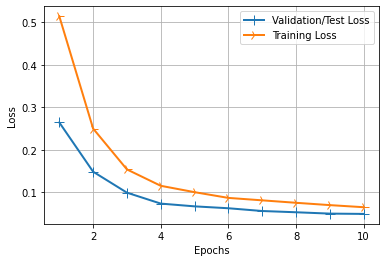

In [ ]:
#plot the loss charts
import matplotlib.pyplot as plt
#use history object to get our saved performance
history_dict = history.history

#extract the loss and the validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

#get the number of epochs and create an array up to that number
#using range()
epochs = range(1,len(loss_values)+1)

#plot line charts for both validation and training loss
line1 = plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2 = plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot our accuracy


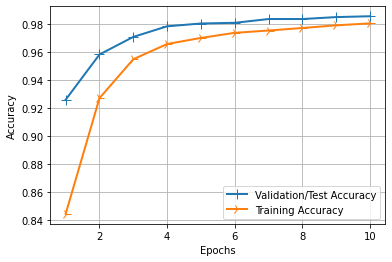

In [ ]:
#plot the accuracy charts
import matplotlib.pyplot as plt

#use history object to get our saved performance
history_dict = history.history

#extract the accuracy of the model 
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

#get the number of epochs and create an array up to that number
#using range()
epochs = range(1,len(loss_values)+1)

#plot line charts for both validation and training loss
line1 = plt.plot(epochs,val_acc_values,label='Validation/Test Accuracy')
line2 = plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#saving the model
model.save('mnist_simple_cnn_10_Epochs.h5')
print('model is saved')

model is saved


In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

# Testing the model on some random  Test data

3	3	9	7	1	

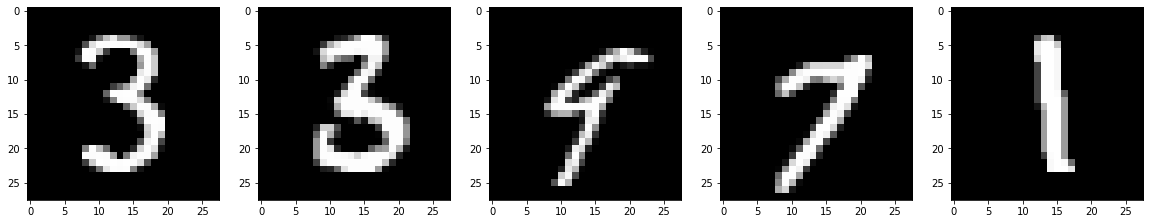

In [ ]:
import numpy as np
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx,:,:,0],cmap='gray')
  plt.axis='off'
  print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)), axis=1),axis=0),end='\t')

## Part 2


# Visualization of the CNN

Load trained CNN and understand what they 'see' or learn, this will help in better understanding how they work. Workflow:

1.Load dataset from milestone 1

2.Analyze the model's performance by viewing Confusion matrix and Classification Report. aim at identifying weaknesses of the model.Look at individual performance of each class of the CNN and see cases where it has trouble classfying the data correctly.

3.Identify all samples wrongly classified by the CNN and display the results. Think why the model got it wrong.

4.Extract our layer outputs and create our activation model. So that we can visualize the activation of each layer. Give the model some input and see how it deals with it.

5.Display output shape of the first activation layer and compare it with the output layer shape that can be seen from the model summary.

6.Show the output of the activation map of 4th convolution filter or feature map of the first convolution layer.

7.Display all the activations for the first 3 layers of the model.

Output: Display of the classification report and confusion matrix. A display of the sample data that is wrongly classified.We then display the activation layer for various CNN layers.

In [ ]:
#Reload the data
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
#Load datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()
model = load_model('mnist_simple_cnn_10_Epochs.h5')


In [ ]:
#Number of rows and cols
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

In [ ]:
#Get data in the right shape for keras 4dimensions
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#Store the shape of a single image
input_shape= (img_rows,img_cols,1)

#Change the image type to float32 data type
x_test = x_test.astype('float32')

#Normalize the data by changing the ranges from 0-255
x_test/=255.0
y_test =to_categorical(y_test)
print(x_test.shape[0],'test samples.')

10000 test samples.


#Display the Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print('\nclassification report:\n',classification_report(np.argmax(y_test,axis=1),y_pred))
print('\nconfusion matrix:\n',confusion_matrix(np.argmax(y_test,axis=1),y_pred))

#Getting the Misclassified Data

In [ ]:
#Getting the misclassified data

import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

#Load the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
#Use numpy to create an array to store a value of 1 when a misclassification occurs

result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result > 0)

#display the indices of the misclassification
print('\n Indices of misclassified data are:\n'+str(result_indices))


 Indices of misclassified data are:
(array([  18,  259,  320,  321,  340,  445,  449,  479,  582,  659,  684,
        717,  720,  740,  844,  882,  947,  965, 1014, 1039, 1112, 1182,
       1226, 1232, 1247, 1260, 1299, 1319, 1326, 1393, 1414, 1500, 1530,
       1553, 1554, 1621, 1681, 1686, 1709, 1717, 1754, 1790, 1878, 1901,
       2035, 2043, 2098, 2109, 2118, 2129, 2130, 2135, 2189, 2272, 2280,
       2293, 2387, 2406, 2414, 2425, 2454, 2488, 2607, 2654, 2720, 2760,
       2896, 2921, 2939, 2953, 2979, 2995, 3005, 3030, 3060, 3073, 3384,
       3422, 3503, 3520, 3558, 3559, 3597, 3726, 3749, 3751, 3767, 3808,
       3811, 3838, 3853, 3906, 4065, 4075, 4078, 4163, 4176, 4224, 4238,
       4248, 4256, 4500, 4571, 4575, 4731, 4761, 4807, 4874, 4956, 5331,
       5642, 5888, 5937, 5955, 5973, 6091, 6166, 6173, 6505, 6571, 6576,
       6597, 6625, 6651, 7432, 7434, 8059, 8094, 8332, 8408, 9009, 9015,
       9019, 9024, 9638, 9642, 9664, 9692, 9729, 9770, 9905, 9982]),)


#Reload the dataset


In [ ]:

#Number of rows and cols
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

#Reshaping the data
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)

#Store the shape of a single image
input_shape = (img_rows,img_cols,1)

#Change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalize the data by changing the range
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#Display misclassified item

8	0	7	7	3	

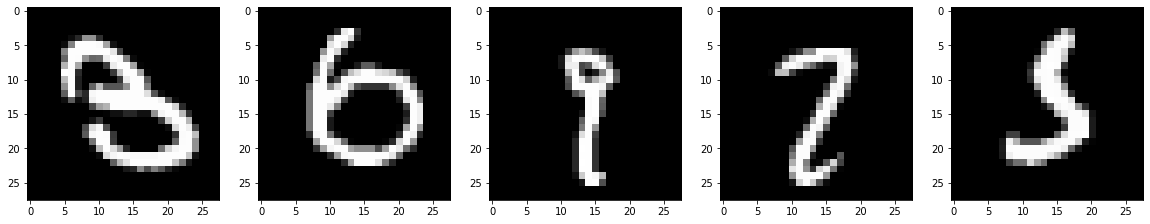

In [ ]:
import matplotlib.pyplot as plt

figure= plt.figure(figsize =(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  index = result_indices[0][i]
  plt.imshow(x_test[index,:,:,0],cmap='gray')
  plt.axis='off'
  prediction = np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)),axis=1),axis=0)
  print(prediction,end='\t')

#Viewing the activation maps of the CNN

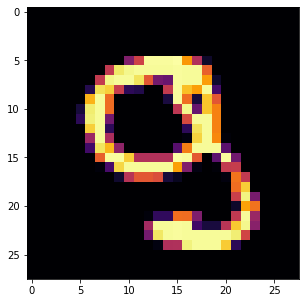

In [ ]:
from tensorflow.keras.models import Model

#Extract the outputs of the top 7 layers
layer_outputs= [layer.output for layer in model.layers[:7]]

#Create a model to return those outputs given the model's input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

#display the test image of the activation model
img_tensor = x_test[151].reshape(1,28,28,1)
figure1 = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis='off'

#Running the model in predict mode to get the activation layer

When an image is fed to the model it returns the values of the layer activations in the original model

In [ ]:
activations=activation_model.predict(img_tensor)
print('Number of layer activation:'+ str(len(activations)) )

Number of layer activation:7


In [ ]:
#activation of the first convolution layer for the input
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                9

the output of the first activation layer can be seen to be of the same shape as the output of the 1st conv layer.

#The output of the 4th conv filter in the first conv layer

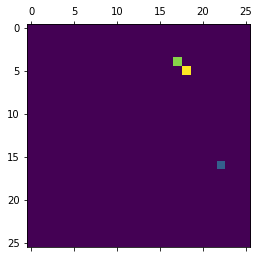

In [ ]:
plt.matshow(first_layer_activation[0,:,:,3],cmap='viridis')

# A function that displays the activations of specific layers


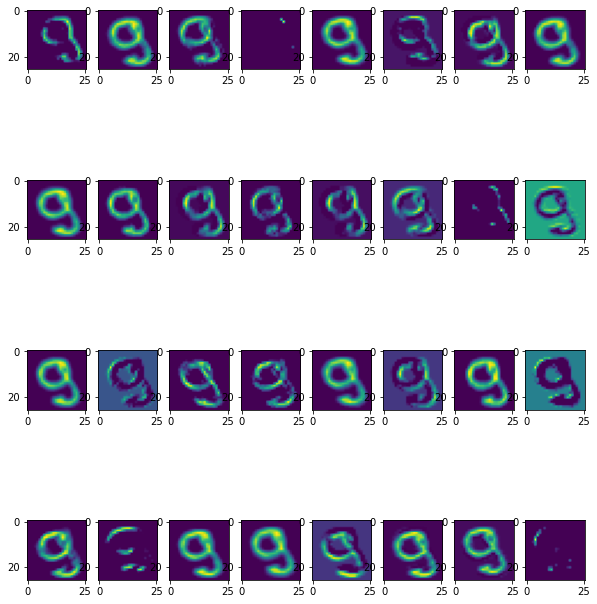

In [ ]:
def display_activations(activations,col_size,row_size,act_index):
  activation = activations[act_index]
  activation_index = 0
  fig,ax = plt.subplots(row_size,col_size, figsize=(row_size*2.5,col_size*1.5))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index],cmap = 'viridis')
      activation_index += 1

display_activations(activations,8,4,0)

#PART 3

#Transfer Learning :

 Understanding  Transfer of Learning

objective: Use Transfer Learning to improve accuracy on the CIFAR10 dataset. Purpose is to help experience using pre-traied models.

Workflow:

1.Load the CIFAR10 dataset (keras dataset) and train a Deeper CNN with various configurations.

2.Train this CNN for 10 Epochs or more using a Batch Size/ of 32 (batch size does not matter significantly as this depends on RAM size)
-Examine the perfomance metrics of trained CNN. The accuracy after 10 Epochs should be between 60 and 65% on the test data. How we can perfom better on this.

3.See what our CNN is capable of by testing the model on some of the Test images used in part 1. How would you compare this classification perfomance to a human.

4.The model created could be dissapointing, we then use the Transfer learning to significantly improve it. (Load the weight of a pre-trained CNN such as VGG16)- to import that model: from tensorflow.keras.applications import vgg16 as vgg.

5.Do not include top layer when loading, we are using this model to apply the concept of Transfer Learning- the function vgg.VGG16(weights='imagenet', include_top=False,input_shape=(48,48,3))

6.Extract the last layer from the 3rd block of the VGG16 model. We will be using the VGG model upto block3_pool

7.Add the classification layers for the CIFAR10 classed on top of it.

8.Freeze all layers in the pretrained VGG16 model since we will be reusing them and compile the merged model. Iterare through out base_model.layers and set the trainable parameter to be false by using layer.trainable=false

9.Keras data generator loading the image data.

10.Train the model and atleast 5 (10 is best) epochs and note the improvement.

11.Visualize the filters of the pre-trained VGG16 model- Reload the VGG16 model, extract the convolution layers since we want the filters and biased values of these. We will inspect the bias and weights usinbg 3rd convlayer using get_wights(). ==a good idea of what filters and biases are.

12.Plot the first 6 conv filters- First normalixe the filter values (0-1) --get filters using f=filters[:,:,:,i]. Plot and visualixe it using plt.imshow(f[f:,:,:,j], cmap='gray')
13.Visulaize the features map of the VGG16 by running an input image (Create your own image) through the model. --redefine the model to output right after the 1st hidden layer using model=Model(input=model.inout,outputs=model.layers[1].output. Using the inbuilt keras preprocessing functions load_img and img_to_img along the numpy's expand_dims and keras VGG16 funtion from tensorflow.keras.applictions.vgg16 import preprocess_input

14.plot these features maps for the output of the 5 convolution blocks indexed as [2,5,9,13,17]

#Training model for CIFAR10 using Deeper CNN

In [ ]:
from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import os

In [ ]:
batch_size=32
num_classes=10
epochs=10

In [ ]:
#load the CIFAR10 dataset

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
#Display data shape/dimesions
print('x_train shape',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

#Format the trainging data by normalizing and changing data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

#one hot encode outputs
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

x_train shape (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
model=Sequential()
#Padding = 'same' results in padding the input such that
#the output has the same length as the original input
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
#model build
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

#Training the model


In [ ]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True,verbose=1)
model.save('cifar_simple_cnn_2.h5')

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0744 - accuracy: 0.6196 - val_loss: 1.0052 - val_accuracy: 0.6526
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0382 - accuracy: 0.6319 - val_loss: 0.9481 - val_accuracy: 0.6689
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0017 - accuracy: 0.6443 - val_loss: 0.9315 - val_accuracy: 0.6765
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9647 - accuracy: 0.6580 - val_loss: 0.9964 - val_accuracy: 0.6488
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9410 - accuracy: 0.6667 - val_loss: 0.8599 - val_accuracy: 0.7007
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9116 - accuracy: 0.6778 - val_loss: 0.8712 - val_accuracy: 0.6941
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8882 - accuracy: 0.6877 - val_loss: 0.8518 - val_accuracy:

In [ ]:
#Evaluate perfomance of trained model
scores=model.evaluate(x_test,y_test,verbose=1)
print('Test loss', scores[0])
print('Test accuracy', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.7669 - accuracy: 0.7326
Test loss 0.7669417262077332
Test accuracy 0.7325999736785889


#Test on some of the Test images

In [ ]:
#create function to get class label
def getName(label,class_labels):
  return class_labels.get(int(label))
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
class_labels={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [ ]:
class_labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

dog	dog	truck	deer	horse	

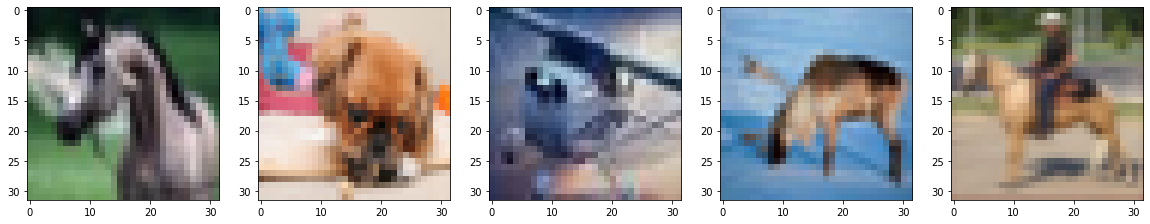

In [ ]:
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx])
  plt.axis='off'
  label=np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1),axis=0)
  print(getName(label,class_labels), end='\t')

#Use transfer learning to get better accuracy

In [ ]:
#Perform the imports
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model
from tensorflow.keras.applications import vgg16 as vgg
from tensorflow.keras.layers import Dropout,Flatten,Dense,GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#define some parameters
BATCH_SIZE=32
EPOCHS=5
NUM_CLASSES=10
LEARNING_RATE=1e-4 
MOMENTUM=0.9

#IMPORT  scipy to resize our images quickly
import scipy.misc
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=np.array([cv2.resize(x,(48,48), interpolation=cv2.INTER_AREA) for x in x_train])
x_test=np.array([cv2.resize(x,(48,48), interpolation=cv2.INTER_AREA) for x in x_test])

In [ ]:
#perfom one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, NUM_CLASSES)
y_test=to_categorical(y_test, NUM_CLASSES)

#Import the pre-trained model VGG16, but without the 'HEAD' layer

In [ ]:
from tensorflow.keras.applications import vgg16 as vgg
base_model = vgg.VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))

58892288/58889256 [==============================] - 2s 0us/step


#Extract the last layer from the third block of the vgg16 model

In [ ]:
last = base_model.get_layer('block3_pool').output

In [ ]:
last

<tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 6, 6, 256) dtype=float32>

#Add classification layers on top of it


In [ ]:
#Add classification layers on top of it
#x is our model that we're putting  ontop part of our pre-trained model
x=GlobalAveragePooling2D()(last)
x=BatchNormalization()(x)
x=Dense(256,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.5)(x)

#Make our top model
number_of_classes=10
top=Dense(number_of_classes,activation='softmax') (x)

#construct full model
model=Model(base_model.input,top)

#Freeze all layers in the model as we'll be reusing them

In [ ]:
#iterate through the base model to 'freeze' the layer so that we dont train them

for layer in base_model.layers:
  layer.trainable=False

#Compile the merged model

In [ ]:
#compiling the merged model
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

#Model Summary

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

#Setup to use the Data Generator Function

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,horizontal_flip=False)

In [ ]:
#Use our data generator to get our data
train_datagen.fit(x_train)
train_generator=train_datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)
val_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=False)
val_datagen.fit(x_test)
val_generator=val_datagen.flow(x_test,y_test,batch_size=BATCH_SIZE)

#Train the model

In [ ]:
#We are ready to start training the model now
train_steps_per_epoch=x_train.shape[0] // BATCH_SIZE
val_steps_per_epoch=x_test.shape[0] // BATCH_SIZE
history=model.fit_generator(train_generator,steps_per_epoch=train_steps_per_epoch, validation_data=val_generator,validation_steps=val_steps_per_epoch, epochs=EPOCHS, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1562/1562 [==============================] - 25s 16ms/step - loss: 0.2328 - accuracy: 0.4658 - val_loss: 0.1752 - val_accuracy: 0.6215
Epoch 2/5
1562/1562 [==============================] - 25s 16ms/step - loss: 0.1817 - accuracy: 0.6029 - val_loss: 0.1543 - val_accuracy: 0.6661
Epoch 3/5
1562/1562 [==============================] - 25s 16ms/step - loss: 0.1639 - accuracy: 0.6472 - val_loss: 0.1433 - val_accuracy: 0.6917
Epoch 4/5
1562/1562 [==============================] - 25s 16ms/step - loss: 0.1544 - accuracy: 0.6688 - val_loss: 0.1376 - val_accuracy: 0.7063
Epoch 5/5
1562/1562 [==============================] - 24s 16ms/step - loss: 0.1464 - accuracy: 0.6874 - val_loss: 0.1315 - val_accuracy: 0.7233


with 5 epochs our accuracy is ~72% compared to 62% with 10 epochs. furthermore using transfer learning for more epochs allows us to attain even better accuracy than with the previous model. we are therefore taking adv of pre-trained model and training only the top layers, this allows us to take adv of the pre-trained weights. We need to check "what exactly do these learned weights know?"

#Visualizing the filters of the pre-trained VGG16 model

In [ ]:
from tensorflow.keras.applications import vgg16 as vgg
model = vgg.VGG16(weights='imagenet',include_top=False)

#get the symbolic outputs of each 'key' layer(we give them unique names)
layer_dict = dict([(layer.name,layer) for layer in model.layers])

In [ ]:
layer_dict

{'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe843d33128>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe831ab2780>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7fe831a91a58>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe843d33278>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe843d335c0>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7fe831b39cc0>,
 'block3_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe831b39550>,
 'block3_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe831b49b70>,
 'block3_conv3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe831a64f28>,
 'block3_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7fe831cdc240>,
 'block4_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7fe831ce8630>,
 'block4_conv

In [ ]:
#sumarise the filter shapes
for layer in model.layers:
   #check for conv layer
   if 'conv' not in layer.name:
     continue
  #get filter weights
   filters,biases = layer.get_weights()
   print(layer.name,filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
#we retrieve the weights from the third hidden layer
filters,biases = model.layers[2].get_weights()


In [ ]:
filters

array([[[[ 1.66219279e-01,  1.42701820e-01, -4.02113283e-03, ...,
           6.18828237e-02, -1.74057148e-02, -3.00644431e-02],
         [ 9.46945231e-03,  3.87477316e-03,  5.08365929e-02, ...,
          -2.77981739e-02,  1.71373668e-03,  6.82722731e-03],
         [ 6.32681847e-02,  2.12877709e-02, -1.63465310e-02, ...,
           8.80054955e-04,  6.68104272e-03, -1.41139806e-03],
         ...,
         [ 3.47490981e-03,  8.47019628e-02, -4.07223180e-02, ...,
          -1.13523193e-02, -7.48998486e-03,  3.19077494e-03],
         [ 5.97234145e-02,  4.97663505e-02, -3.23118735e-03, ...,
           1.43114366e-02,  3.03175431e-02, -4.23925705e-02],
         [ 1.33459672e-01,  4.95484173e-02, -1.78808011e-02, ...,
           2.25385167e-02,  3.02020740e-02, -2.17075031e-02]],

        [[ 2.12007999e-01,  2.10127644e-02, -1.47626130e-02, ...,
           2.29580477e-02,  1.23102348e-02, -3.08422819e-02],
         [-2.62175221e-03,  7.42094172e-03,  6.74030930e-02, ...,
          -3.06594316e

In [ ]:
biases

array([-0.30912212,  0.36397225,  0.13737613,  0.07717966,  0.9052184 ,
        0.08885256,  0.10789118, -0.23106739, -0.6318097 ,  0.18161367,
       -0.33391494,  0.1961724 ,  0.43838617,  0.1938708 ,  0.10894354,
        0.10315038, -1.0271513 ,  0.05252688,  0.13118458,  0.22851577,
       -0.71377224,  0.2154155 , -0.6981962 ,  0.04061132,  0.13955347,
        0.28767544,  0.35358745,  0.3937295 ,  0.43452853, -0.48259264,
        0.02631121,  0.09220165,  0.05196398,  0.550705  ,  0.32368094,
        0.07263482, -0.17745508,  0.3761972 ,  0.39344102,  0.17673127,
       -0.15784228,  0.26051855,  0.08342359,  0.08603705, -0.09131282,
        0.22932515,  0.2998315 ,  0.13511261, -0.3835829 ,  0.10912544,
       -0.53432876,  0.4741787 , -0.0740848 ,  0.30046257,  0.12590808,
        0.16480374,  0.2403943 ,  0.23401979, -0.19334187,  0.01663565,
        0.27144948,  0.03385786,  0.06076292, -0.5825159 ], dtype=float32)

In [ ]:
#shape of the conv filters
filters.shape

(3, 3, 64, 64)

In [ ]:
#shape of biases
biases.shape

(64,)

In [ ]:
#normalize the filters values to be btn 0-1 so that we can visualize them
f_min,f_max = filters.min(),filters.max()
filters = (filters-f_min)/(f_max-f_min)

In [ ]:
f_min

-0.21561293

In [ ]:
f_max

0.28917095

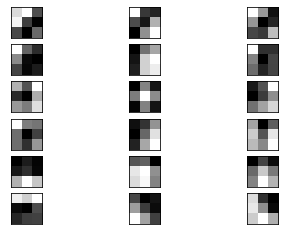

In [ ]:
#we visualize the filters
import matplotlib.pyplot as plt
#plot the first few filters
n_filters,ix=6,1

for i in range (n_filters):
  #get the filter
  f = filters[:,:,:,i]
  #plot each channel separately 
  for j in range(3):
    #specify subplot and turn on axis
    ax = plt.subplot(n_filters,3,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    #plot filter channel in gray scale
    plt.imshow(f[:,:,j],cmap='gray')
    ix+=1
#show the figure
plt.show()



#Visualize the activation feature map for the VGG16 by running an input image

In [ ]:
#plot the feature map of the 1st conv layer for given image
from tensorflow.keras.applications.vgg16 import  VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import  img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

#load the model
model = VGG16()

553467904/553467096 [==============================] - 18s 0us/step


In [ ]:
#create a model that will return these outputs given the model input
#we redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs,outputs=model.layers[1].output)

In [ ]:
#display the model summary
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#load the image with requires shape
img = load_img('sample_1.jpg',target_size=(224,224))

#convert the image to an array
img = img_to_array(img)

#expand the dimensions so that it represents a single sample
img = expand_dims(img,axis=0)

#prepare the image(e.g scale the pixel valiues for the vgg)
img = preprocess_input(img)

#get the feature map for the 1st hidden layer
feature_maps = model.predict(img)

#we plot the 64 maps in an 8 * 8 squares

square = 8
ix = 1
plt.figure(figsize=(12,12))

for _ in range(square):
  for _ in range (square):
    #specify subplot and turn off axis
    ax = plt.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])

    #plot the filter channel in grayscale
    plt.imshow(feature_maps[0,:,:,ix-1], cmap='gray')
    ix += 1
#show the figure
plt.show()

FileNotFoundError: ignored

#**PART 4**

#Visualizing Filter maximizations, Grad-CAM(gradient-weighted class activation mapping)and class maximization.

#Maximizing filter Activations


You add a loss function that maximizes the value of a given filter in agiven conv layer,we then use sgd to adjust the values of the input image so as to max the activation value

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.applications import VGG16

In [ ]:
from keras import backend as K

In [ ]:
model = VGG16(include_top=False,weights='imagenet') #building the VGG16 network

In [ ]:
#create new model of intermediate layer
layer_output = model.get_layer('block3_conv3').output
activation = models.Model(model.input,layer_output)#new model

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
#initialize an image which will send to the model
def init_img():
  image = tf.random.uniform((1,150,150,3))
  image = (image - 0.5) * 0.25
  return image

In [ ]:
#define the loss for filter visualization here we look at maximizing the loss
def vis_loss(image,filter_index):
  feature = activation(image)
  loss = tf.math.reduce_mean(feature[:,2:-2,2:-2,filter_index])
  return loss

In [ ]:
#define the gradient descent for image visualization
def gradient(image,filter_index):
  for i in range(30):
    with tf.GradientTape() as tape:
      loss = vis_loss(image,filter_index)
    grads = tape.gradient(loss,image)
    grads = tf.math.l2_normalize(grads)
    image += 10 *grads
    return loss,image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def deprocess_image(img):
  #normalize array: center on 0., ensure variance is 0.15
  img = img.mean()
  img /= img.std() +1e-5
  img *= 0.15

  #center crop
  img = img[25:-25,25:-25,:]

  #clip to [0,1]
  img += 0.5
  img = np.clip(img,0,255).astype('uint8')
  return img

In [ ]:
def visualization_filter(filter_index):
  img = init_img()
  for i in range (30):
    loss,image = gradient(image, filter_index)
    img = deprocess_image(image[0].numpy())
    plt.imshow(img)

In [ ]:
visualization_filter(0)

UnboundLocalError: ignored

In [ ]:
#explore 3rd conv block
layer_name = 'block3_conv1'

#use any integer from 0 to 511, since we have 512 filters in that layer
filter_index = 0

#build a loss function that max the activation of the nth filter of the layer considered
#we use the get_layer function
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])


To implement gradient descent, you would need the gradient of this loss with respect to model's input. we need to use the gradient function packaged with the backend model of keras

In [ ]:
#we compute the gradient of the input picture w.r.t to the loss
tf.compat.v1.disable_eager_execution() #costly approach
grads = K.gradients(loss,model.input)[0]

In [ ]:
#to help the gradient descent process go smoothly we can normalize the gradient tensors by dividing
#that value by its L2 norm. (the square of the root of the average of the square of the values in the tensor)-> ensures
#that the magnitude of the updates done to the image is always within the same range

#normalization trick : we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

ValueError: ignored

Using tensorflow version 1.x



In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
#reimported since tensorflow 1.0 failed
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.applications import VGG16
from keras import backend as K


In [ ]:
model = VGG16(include_top=False,weights='imagenet') #building the VGG16 network
#explore 3rd conv block
layer_name = 'block3_conv1'

#use any integer from 0 to 511, since we have 512 filters in that layer
filter_index = 0

#build a loss function that max the activation of the nth filter of the layer considered
#we use the get_layer function
layer_output = model.get_layer(layer_name).output

loss = K.mean(layer_output[:,:,:,filter_index])
grads = K.gradients(loss,model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
iterate = K.function ([model.input],[loss,grads])

In [ ]:
#now we can define a python loop to do stochastic gradient
import numpy as np

img_width,img_height =150,150
#we start from a gray image with some noise
input_img_data=np.random.random((1,img_width,img_height,3))


In [ ]:
step = 1.0
#run the gradient ascent for 50 steps

for i in range (50):
  loss_values,grads_value = iterate([input_img_data])
  input_img_data += grads_value * step

#Deprocess Function


The resulting image tensor is a floating point tensor of shape (1,150,150,3) with values that may not be integers with the range [0,255] hence we need to postproces the tensor to turn it into a displayable image

In [ ]:
# util function to convert a tensor into a valid image

def deprocess_image(x):
  #normalize tensor: center on 0,0 to ensure that std 0.1
  x -= x.mean()
  x /= (x.std()- 1e-5)
  x *= 0.1
  #clip to [x,0,1]
  x += 0.5
  x = np.clip(x,0,1)
  #to convert to rgb
  x *= 255
  x = np.clip(x,0,255).astype('uint8')
  return x

with this we can plot image tensor representing the pattern that maximizes the activation of the specified filter

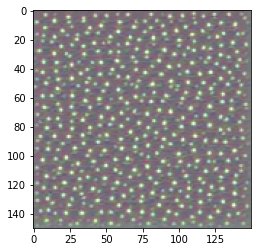

In [ ]:
import matplotlib.pyplot as plt

img = input_img_data[0]
plt.imshow(deprocess_image(img))

#We can create a simple function for this entire process

In [ ]:
def generate_pattern(layer_name,filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,filter_index])
  grads = K.gradients(loss,model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) +1e-5)
  iterate = K.function([model.input],[loss,grads])
  input_img_data = np.random.random((1,size,size,3))
  step= 1.0
  for i in range (40):
    loss_value,grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
  img = input_img_data[0]
  return deprocess_image(img)

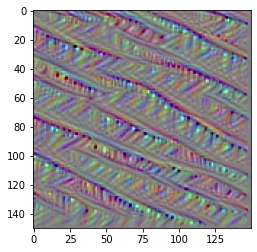

In [ ]:
plt.imshow(generate_pattern('block3_conv3',22))


#Implementing Grad-CAM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Let's use the Xception model to demonstrate the Grad-CAM

In [ ]:
#load the xception model
model_builder = keras.applications.xception.Xception

#define the input size
img_size = (299,299)

#extract the pre_process input and decode predict functions
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

#store the names of the last conv layer
last_conv_layer_name = 'block14_sepconv2_act'
classifier_layer_names = ['avg_pool','predictions',]


#Point to our image

In [ ]:
#the local path of our target image
img_path = keras.utils.get_file('african _elephant.jpg','https://i.imgur.com/Bvro0YD.png')


4218880/4217496 [==============================] - 0s 0us/step


In [ ]:
display(img_path)

'/root/.keras/datasets/african _elephant.jpg'

#Helper function that loads our image in the right format


In [ ]:
def get_img_array(img_path,size):
  #img is a PIL image of size 299*299
  img = keras.preprocessing.image.load_img(img_path,target_size=size)
  array = keras.preprocessing.image.img_to_array(img)
  array = np.expand_dims(array,axis=0)
  return array

#The Grad-CAM Heatmap function

In [ ]:
def make_gradcam_heatmap(img_array,model,last_conv_layer_name,classifier_layer_names):
  #first we create a model that maps the input image to the activations of the last conv layer
  last_conv_layer = model.get_layer(last_conv_layer_name)
  last_conv_layer_model = keras.Model(model.inputs,last_conv_layer.output)
  #second we create a model that maps the activations of the last conv layer
  #to the final class predictions
  